In [2]:
%matplotlib inline

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
# import sckitlearn.

In [116]:
D=pd.read_csv("../Titanic/train.csv")
D.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
# D.describe(include= 'all')

In [98]:
# feature engineering
# Parch
# D.Parch[D.Parch>1]=1
D.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

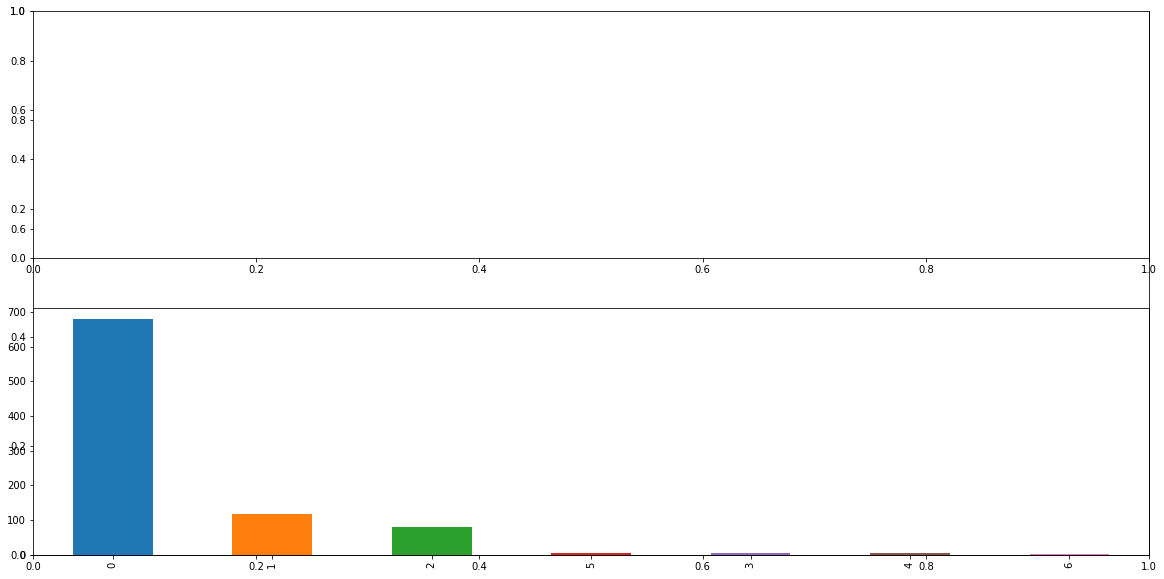

In [117]:
fig=plt.figure(figsize=[20,10])
ax1=fig.subplots(1,1)
ax2=fig.subplots(2,1)
axs2=D.Parch.value_counts().plot(kind='bar')
# ax3=fig.add_subplot(3,1)

In [123]:
# change to numeric
def strtocat(val):
    if type(val) == str:
        val=val.strip()
        val=val[0]
    return(val)

D.Cabin=D.Cabin.fillna(0)

cap = lambda x: strtocat(x)
D.Cabin=D.Cabin.apply(cap)

D.Cabin.unique()

array([0, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [130]:
CS=D.groupby('Survived')['Cabin'].sum()
# CS.head()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [21]:
#encoding some features into categorical numbers
# DT.drop("Name", axis=1)
# D.Sex=D.Sex.astype("category").cat.codes
# D.Ticket=D.Ticket.astype('category').cat.codes
# D.Cabin=D.Cabin.astype('category').cat.codes
# D.Embarked=D.Embarked.astype('category').cat.codes

In [63]:
Dum=pd.get_dummies(D.Cabin,prefix='cab')
D=pd.concat([D,Dum],axis=1)
# D.append(Cabi)

In [65]:
D.drop('Cabin',axis=1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,T,cab_0,cab_A,cab_B,cab_C,cab_D,cab_E,cab_F,cab_G,cab_T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0,0,0,0,0,0,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,0,1,0,0,0,0,0,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,0,0,0,0,0,0,1,0,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,0,1,0,0,0,0,0,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,0,1,0,0,0,0,0,0,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,0,1,0,0,0,0,0,0,0,0


In [69]:
# corr=D.corr()#["Survived"]
# plt.figure(figsize=(20, 20))

# sns.heatmap(corr, vmax=0.6, linewidths=0.01,
#             square=True,annot=True,cmap='YlGnBu',linecolor="white")
# plt.title('Correlation between features');

In [85]:
#drop the outcome and save it as a separate DF, also drop non numeric ALSO DROP NA
DT=D
DT=DT.dropna(axis=0)
DTy=DT[['Survived']].copy()
DT=DT.drop(["Name","Survived", "Embarked","Sex","Cabin","Ticket"], axis=1)
DT=DT.dropna(axis=0)
# DT.drop("Cabin", axis=1)
# DT.drop("Name", axis=1)

In [86]:
DT.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,0,A,B,C,...,T,cab_0,cab_A,cab_B,cab_C,cab_D,cab_E,cab_F,cab_G,cab_T
0,1,3,22.0,1,0,7.2500,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,1,38.0,1,0,71.2833,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,5,3,35.0,0,0,8.0500,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [124]:
DS=pd.read_csv("../Titanic/test.csv")

In [125]:
# # refining data for test
# DS.Sex=DS.Sex.astype("category").cat.codes
# DS.Ticket=DS.Ticket.astype('category').cat.codes
# DS.Cabin=DS.Cabin.astype('category').cat.codes
# DS.Embarked=DS.Embarked.astype('category').cat.codes

In [126]:
# DS=DS.drop(["Name"], axis=1)
# DS=DS.dropna(axis=0)

In [129]:
# result=DS[['PassengerId']].copy()
# result['Survived']=(model.predict(DS))

In [135]:
# result.head()
# result.to_csv("../Titanic/submission.csv",index=False)

In [72]:
# R=pd.read_csv("../Titanic/gender_submission.csv")
# R.head()

In [87]:
from sklearn. model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(DT,DTy,test_size=0.33)

In [88]:
# fit log rrg model with numeric non nan, numeric data
model = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train,Y_train)

/home/charlie/environments/PFDS/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
model.score(X_test,Y_test)


0.7446808510638298

In [90]:
from sklearn.svm import SVC
model2=SVC(gamma='auto').fit(X_train,Y_train)
model2.score(X_test,Y_test)


/home/charlie/environments/PFDS/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5787234042553191

In [91]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=0).fit(X_train,Y_train)
model3.score(X_test,Y_test)

0.6425531914893617

In [92]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=0).fit(X_train,Y_train)
model3.score(X_test,Y_test)

0.6425531914893617

In [51]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
# y_kmeans = kmeans.predict(X_train,)

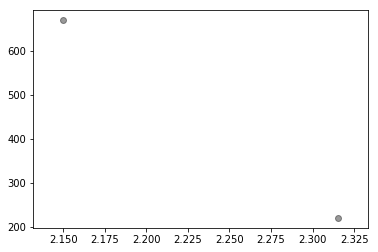

In [93]:
X_train.columns

Index(['PassengerId',      'Pclass',         'Age',       'SibSp',
             'Parch',        'Fare',             0,           'A',
                 'B',           'C',           'D',           'E',
                 'F',           'G',           'T',       'cab_0',
             'cab_A',       'cab_B',       'cab_C',       'cab_D',
             'cab_E',       'cab_F',       'cab_G',       'cab_T'],
      dtype='object')

In [ ]:
x=[2,3,4,5,]